In [1]:
import pandas as pd

# Load the training data
train_df = pd.read_csv('/content/Titanic_train.csv')

# Load the testing data
test_df = pd.read_csv('/content/Titanic_test.csv')

# Display the first few rows of the training data
print("Training Data Head:")
display(train_df.head())

# Display the first few rows of the testing data
print("\nTesting Data Head:")
display(test_df.head())

Training Data Head:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Testing Data Head:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


EDA

In [2]:
# Check for missing values in the training data
print("Missing values in training data:")
display(train_df.isnull().sum())

Missing values in training data:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [3]:
# Check for missing values in the testing data
print("\nMissing values in testing data:")
display(test_df.isnull().sum())


Missing values in testing data:


,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


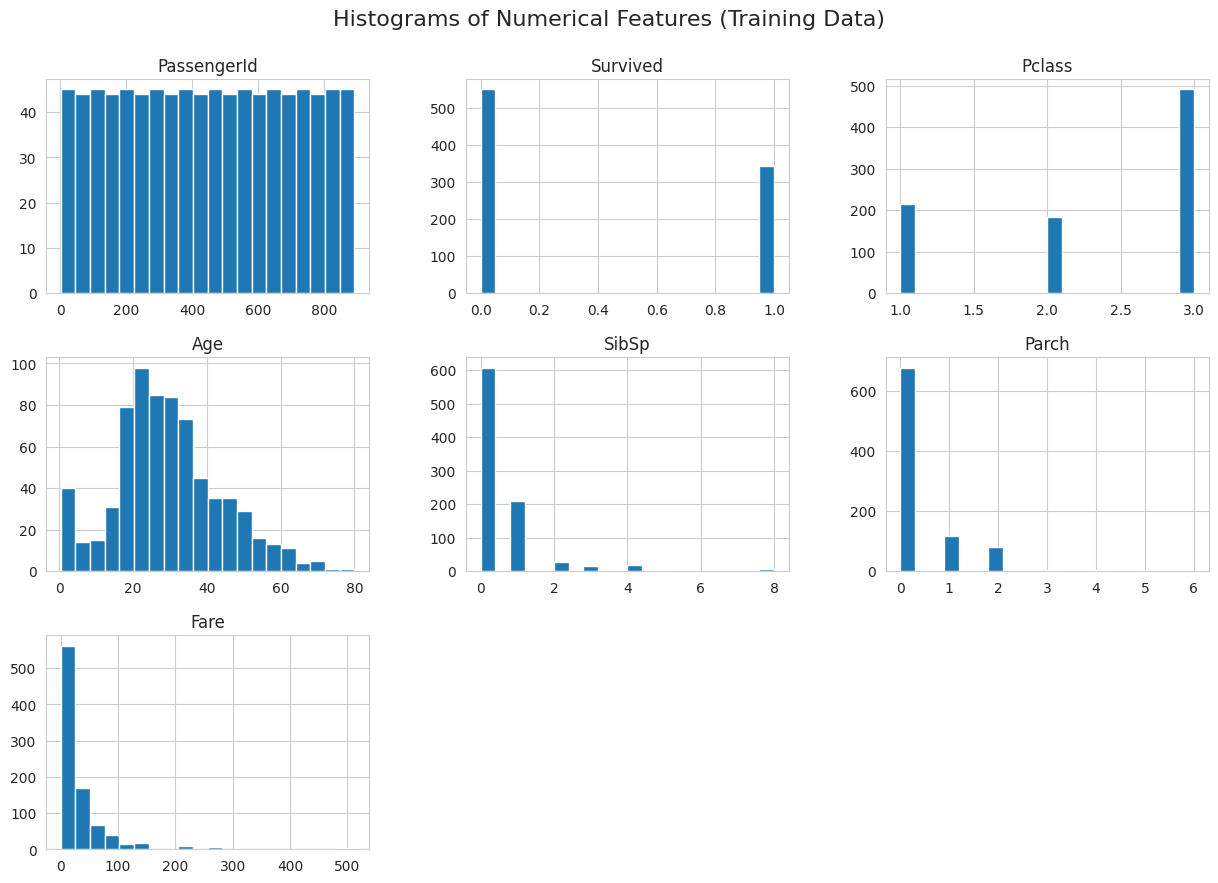

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style('whitegrid')

# Plot histograms for numerical features in the training data
train_df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features (Training Data)', y=0.95, fontsize=16)
plt.show()

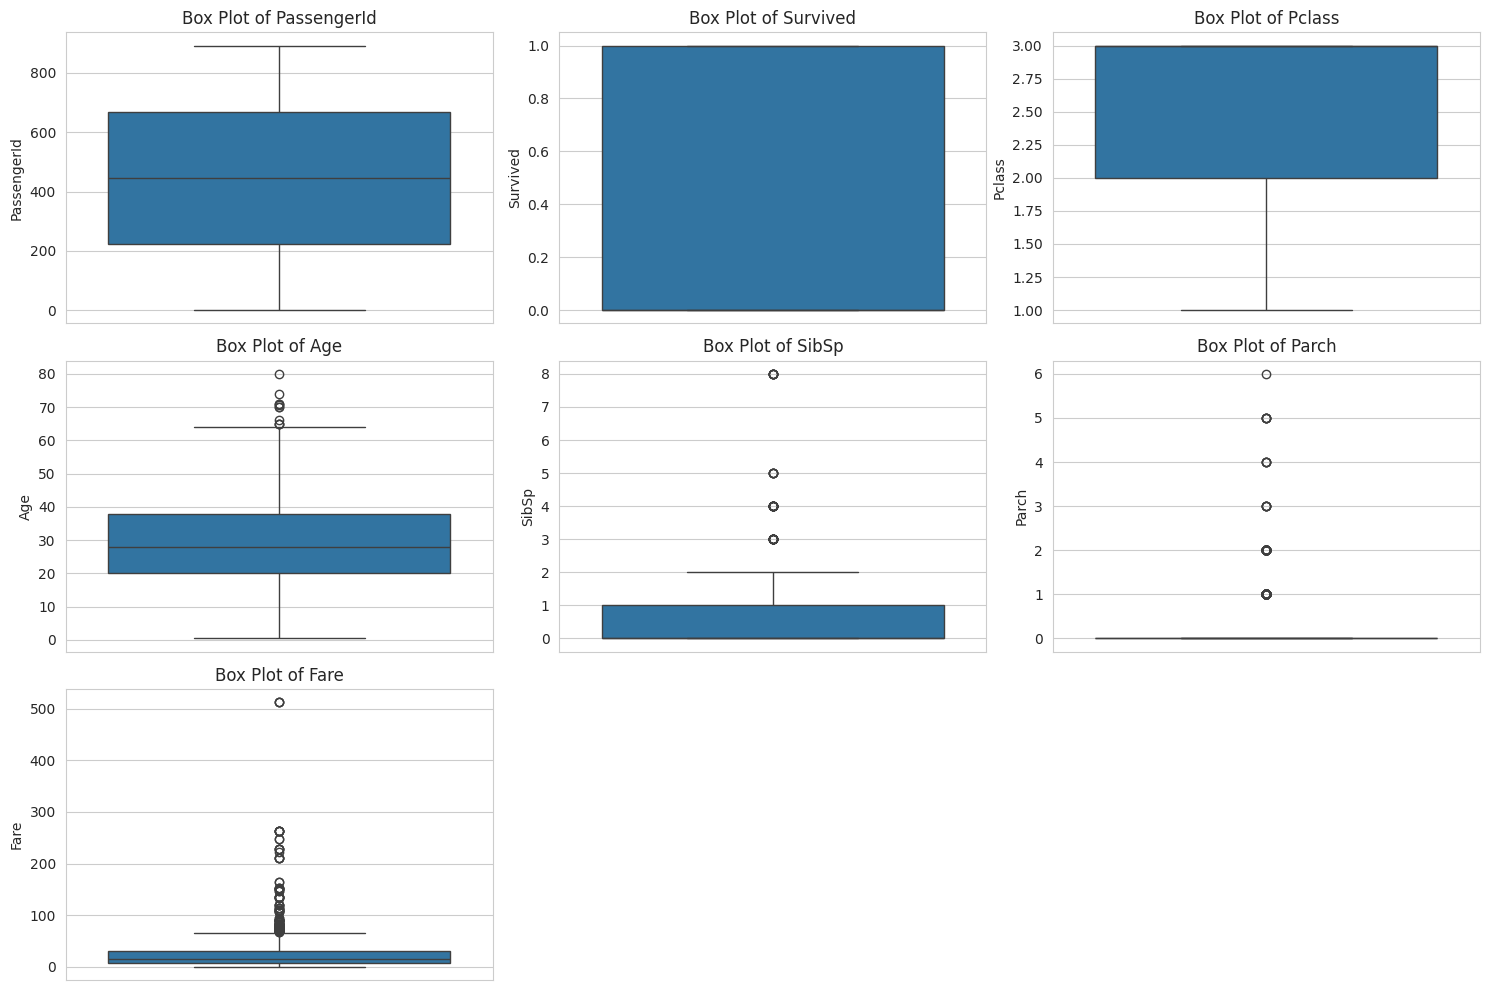

In [5]:
# Plot box plots for numerical features in the training data to check for outliers
numerical_cols = train_df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=train_df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [6]:
# Explore the relationship between categorical features and survival
categorical_cols = ['Sex', 'Pclass', 'Embarked']

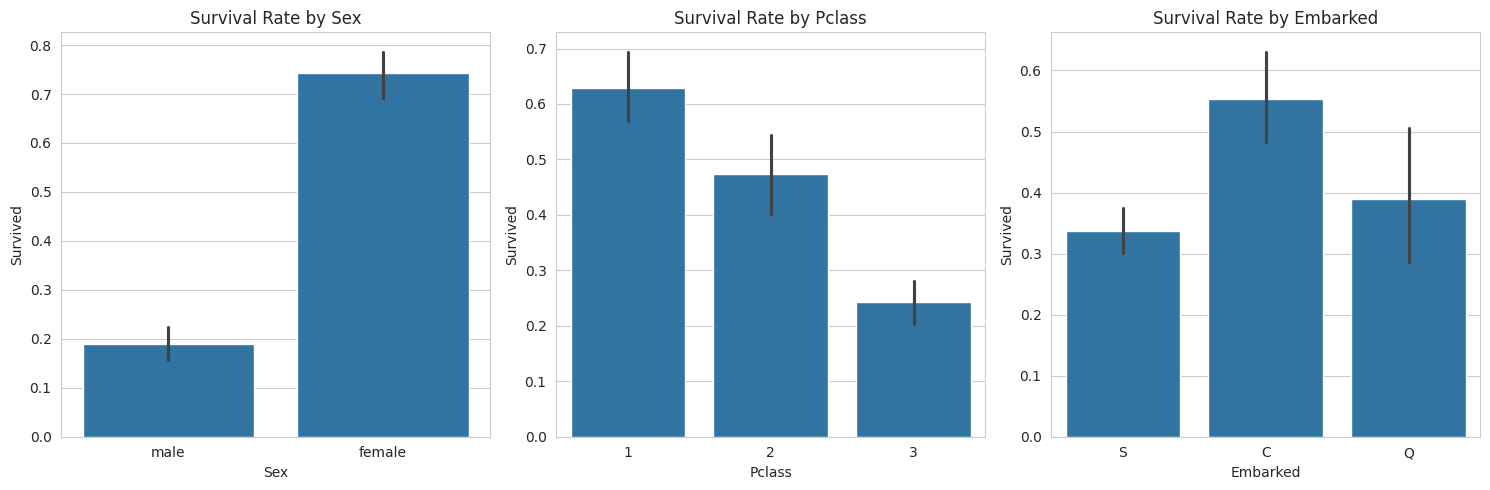

In [7]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i + 1)
    sns.barplot(x=col, y='Survived', data=train_df)
    plt.title(f'Survival Rate by {col}')
plt.tight_layout()
plt.show()

In [8]:
# Explore the relationship between numerical features and survival (using Age and Fare as examples)
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Survival Distribution by Age')

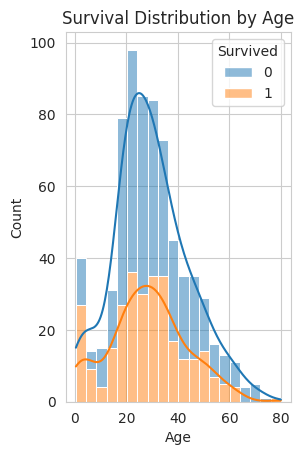

In [9]:

plt.subplot(1, 2, 1)
sns.histplot(data=train_df, x='Age', hue='Survived', multiple='stack', kde=True)
plt.title('Survival Distribution by Age')

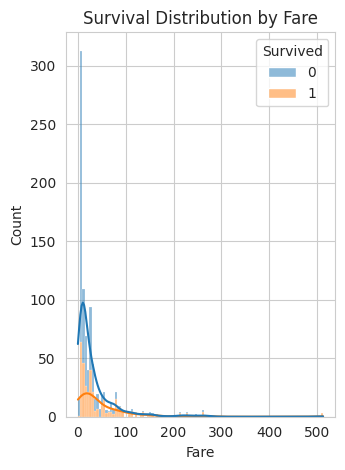

In [10]:
plt.subplot(1, 2, 2)
sns.histplot(data=train_df, x='Fare', hue='Survived', multiple='stack', kde=True)
plt.title('Survival Distribution by Fare')

plt.tight_layout()
plt.show()

In [11]:
# Impute missing values

# Impute missing 'Age' values with the median age in the training data
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())


In [12]:
# Impute missing 'Embarked' values with the mode in the training data
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

In [13]:
# Impute missing 'Fare' value in the testing data with the median fare
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

In [14]:
# Drop the 'Cabin' column due to a large number of missing values, if it exists
if 'Cabin' in train_df.columns:
    train_df = train_df.drop('Cabin', axis=1)
if 'Cabin' in test_df.columns:
    test_df = test_df.drop('Cabin', axis=1)

In [15]:
# Verify that there are no more missing values
print("Missing values in training data after imputation:")
display(train_df.isnull().sum())

print("\nMissing values in testing data after imputation:")
display(test_df.isnull().sum())

Missing values in training data after imputation:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0



Missing values in testing data after imputation:


,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [16]:
# Encode categorical variables using one-hot encoding

if 'Sex' in train_df.columns and 'Embarked' in train_df.columns:
    train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)
if 'Sex' in test_df.columns and 'Embarked' in test_df.columns:
    test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=True)

# Display the first few rows of the modified dataframes
print("Training Data Head after encoding:")
display(train_df.head())

print("\nTesting Data Head after encoding:")
display(test_df.head())

Training Data Head after encoding:


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,False,True



Testing Data Head after encoding:


,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,True,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,True,True,False
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,True,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,False,False,True


Model Building

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb_
import xgboost as xgb_model

In [41]:

# Split the training data for model training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
# Prepare the test data for prediction
X_test = test_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [43]:

# Ensure consistent columns between training and testing data after one-hot encoding
train_cols = X_train.columns
test_cols = X_test.columns

In [44]:
missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test[c] = 0
# Ensure the order of columns is the same
X_test = X_test[train_cols]

In [45]:
# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [52]:
# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [53]:
# Evaluate the models on the validation set
lgb_accuracy = accuracy_score(y_val, lgb_pred)
xgb_accuracy = accuracy_score(y_val, xgb_pred)

In [55]:
# Evaluate the models on the validation set
lgb_accuracy = accuracy_score(y_val, lgb_pred)
xgb_accuracy = accuracy_score(y_val, xgb_pred)


print(f"LightGBM Validation Accuracy: {lgb_accuracy:.4f}")
print(f"XGBoost Validation Accuracy: {xgb_accuracy:.4f}")

LightGBM Validation Accuracy: 0.8268
XGBoost Validation Accuracy: 0.8045


In [65]:
# Evaluate models on the validation set using additional metrics
lgb_precision = precision_score(y_val, lgb_pred)
lgb_recall = recall_score(y_val, lgb_pred)
lgb_f1 = f1_score(y_val, lgb_pred)

xgb_precision = precision_score(y_val, xgb_pred)
xgb_recall = recall_score(y_val, xgb_pred)
xgb_f1 = f1_score(y_val, xgb_pred)

print("LightGBM Validation Metrics:")
print(f"  Precision: {lgb_precision:.4f}")
print(f"  Recall: {lgb_recall:.4f}")
print(f"  F1-score: {lgb_f1:.4f}")

print("\nXGBoost Validation Metrics:")
print(f"  Precision: {xgb_precision:.4f}")
print(f"  Recall: {xgb_recall:.4f}")
print(f"  F1-score: {xgb_f1:.4f}")

LightGBM Validation Metrics:
  Precision: 0.7945
  Recall: 0.7838
  F1-score: 0.7891

XGBoost Validation Metrics:
  Precision: 0.7671
  Recall: 0.7568
  F1-score: 0.7619


Comaprative Analysis

In [57]:
# Create a DataFrame to compare the metrics
metrics_data = {'Model': ['LightGBM', 'XGBoost'],
                'Accuracy': [lgb_accuracy, xgb_accuracy],
                'Precision': [lgb_precision, xgb_precision],
                'Recall': [lgb_recall, xgb_recall],
                'F1-score': [lgb_f1, xgb_f1]}

In [58]:
metrics_df = pd.DataFrame(metrics_data)

print("Model Performance Comparison on Validation Set:")
display(metrics_df)

Model Performance Comparison on Validation Set:


,Model,Accuracy,Precision,Recall,F1-score
0,LightGBM,0.826816,0.794521,0.783784,0.789116
1,XGBoost,0.804469,0.767123,0.756757,0.761905


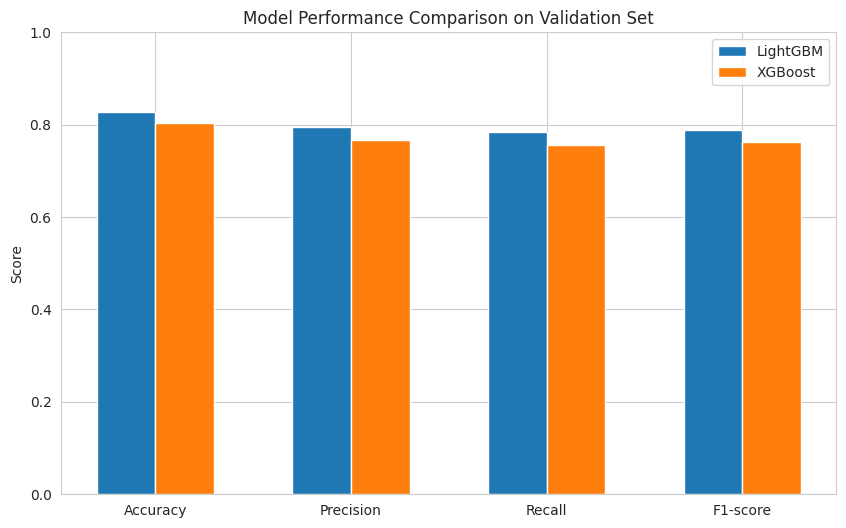

In [64]:
# Visualize the comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
x = range(len(metrics))

plt.figure(figsize=(10, 6))
plt.bar(x, metrics_df[metrics_df['Model'] == 'LightGBM'][metrics].values[0], width=0.3, label='LightGBM', align='center')
plt.bar([i + 0.3 for i in x], metrics_df[metrics_df['Model'] == 'XGBoost'][metrics].values[0], width=0.3, label='XGBoost', align='center')
plt.xticks([i + 0.15 for i in x], metrics)
plt.ylabel('Score')
plt.title('Model Performance Comparison on Validation Set')
plt.legend()
plt.ylim(0, 1)
plt.show()

Summary and Conclusion
Based on the comparative analysis on the validation set:

LightGBM performed slightly better than XGBoost across all evaluated metrics (Accuracy, Precision, Recall, and F1-score).
The differences in performance were not substantial, suggesting both models are capable of making reasonable predictions on this dataset.
Practical Implications:

Given its slightly better performance and often faster training time, LightGBM might be the preferred choice for this particular problem.
However, both models are powerful gradient boosting algorithms, and their performance can be further optimized through extensive hyperparameter tuning and feature engineering.
For a real-world application, it would be beneficial to:

Perform more rigorous hyperparameter tuning using techniques like GridSearchCV or RandomizedSearchCV.
Implement cross-validation for a more robust evaluation of the models.
Explore additional feature engineering based on the existing columns (e.g., extracting titles from names, creating family size features).
Finally, evaluate the chosen model on the unseen test dataset to get a final performance estimate.